Ingresa el nombre del objeto:  lambda tau
Ingresa el radio de búsqueda en arcominutos:  10


Coordenadas de lambda tau - RA: 60.1700698910475°, DEC: 12.49034444100722°
Coordenadas de lambda tau - RA_HMS: 4:00:40.8167739, DEC_DMS: +12:29:25.239988
INFO: Query finished. [astroquery.utils.tap.core]
Se hallaron 497 objetos
✅ Catálogo descargado
Para el objeto lambda tau se tienen los sectores:

  sectorName   sector camera ccd
-------------- ------ ------ ---
tess-s0005-1-4      5      1   4
tess-s0032-1-4     32      1   4
tess-s0042-4-3     42      4   3
tess-s0043-3-2     43      3   2
tess-s0044-1-1     44      1   1
tess-s0070-4-2     70      4   2
tess-s0071-2-4     71      2   4



Ingrese el sector a analizar: 5


✅ Archivo .sh del sector listo
Es posible descargar 19137 imágenes del sector 5
📌Última imagen descargada: 13


Imagen de inicio 99
Imagenes por ciclo 3
Cuantos ciclos de 3 imagenes 2
Se descargarán 3 imágenes por ciclo (~102MB cada vez). 
Continuar? [y/n]:  y


Output()

✅Última imagen descargada: 105
🔍 Gaia DR2 ID de lambda tau: 3305012316783145728
Datos agregados correctamente, actualmente se cuenta con 9 datos
Periodo real orbital: 0.22802784815322416 días
(0, 8)


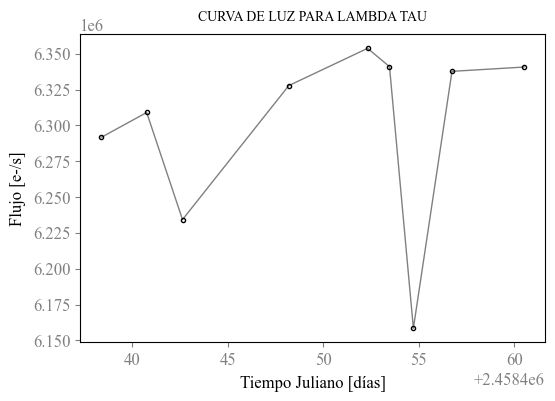

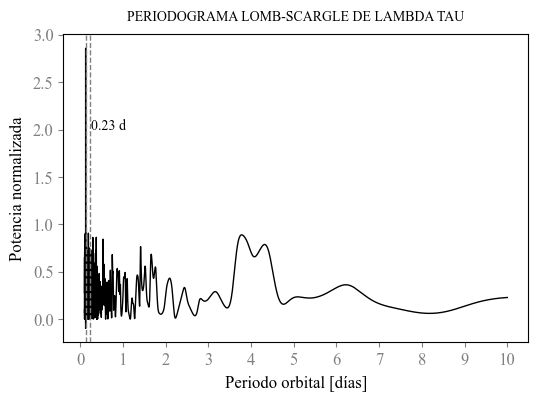

In [160]:
%run Base_code_python.py

In [135]:
import os
import subprocess
import shutil
from concurrent.futures import ThreadPoolExecutor
from rich.progress import Progress, TextColumn, BarColumn, TimeRemainingColumn
from rich.console import Console

console = Console()

def procesar_imagenes():
    """Descarga y analiza imágenes en ciclos manteniendo la paralelización."""
    if input(f"Se descargarán {porciclo} imágenes por ciclo (~{porciclo * 34}MB cada vez). \nContinuar? [y/n]: ") != "y":
        console.print("❌ Cancelado", style="bold red")
        return
        
    max_workers = min(10, os.cpu_count())
    dest_dir = "./imagenes"
    
    # Configuración de la barra de progreso global
    with Progress(
        TextColumn("[bold cyan]{task.description}"),
        BarColumn(bar_width=20, style="white", complete_style="bright_cyan"),
        TextColumn("[bold cyan]{task.percentage:>3.0f}%"),
        TimeRemainingColumn()
    ) as progress:
        for i in range(ciclos):
            os.makedirs(dest_dir, exist_ok=True)
            if os.path.basename(os.getcwd()) == os.path.basename(dest_dir):
                os.chdir("..")
            
            inicio_ciclo = inicio + i * porciclo
            fin_ciclo = inicio_ciclo + porciclo
            
            with open(archivo_sh, "r") as archivo:
                lineas = [linea.strip() for idx, linea in enumerate(archivo) if inicio_ciclo <= idx < fin_ciclo]
            
            # Agregar una nueva tarea para este ciclo
            task = progress.add_task(
                f"[white][{inicio_ciclo}-{fin_ciclo-1}] ⏳ Descargando...", 
                total=len(lineas),
                bar_style="bright_cyan"  # Asegurar que inicie en cyan
            )
            with ThreadPoolExecutor(max_workers=max_workers) as executor:
                def descargar(linea):
                    nombre = os.path.join(dest_dir, os.path.basename(linea)) if "http" in linea else None
                    subprocess.run(f"{linea} -o {nombre}", shell=True, stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL,cwd="./imagenes")
                    progress.update(task, advance=1)
                list(executor.map(descargar, lineas))
           
            progress.update(task, description=f"[white][{inicio_ciclo}-{fin_ciclo-1}] 🟡 Analizando...",bar_style="bright_cyan")
            subprocess.run("python phot4.py", shell=True, capture_output=True, text=True)
            shutil.rmtree(dest_dir)
            os.makedirs(dest_dir, exist_ok=True)
            
            # Marcar la tarea como completada
            progress.update(task, description=f"[bold cyan][{inicio_ciclo}-{fin_ciclo-1}] [cyan]✅ Done")
            progress.refresh()

In [137]:
import os
inicio = int(input("Imagen de inicio"))
porciclo =  int(input("Imagenes por ciclo"))
ciclos = int(input(f"Cuantos ciclos de {porciclo} imagenes"))
sector_seleccionado=5
archivo_sh=
procesar_imagenes("tess_prueba.sh",inicio,porciclo,ciclos,5)

Imagen de inicio 2
Imagenes por ciclo 2
Cuantos ciclos de 2 imagenes 2
Se descargarán 2 imágenes por ciclo (~68MB cada vez). 
Continuar? [y/n]:  y


Output()